# Part 1. Data Processing:

In [47]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [48]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# 1. Explore the Dataset:

In [49]:
data.head(30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
data.shape

(41188, 21)

# 2. Handle Missing Data:

In [51]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Observation : There is no missing value.

# 3. Handle Outliers :

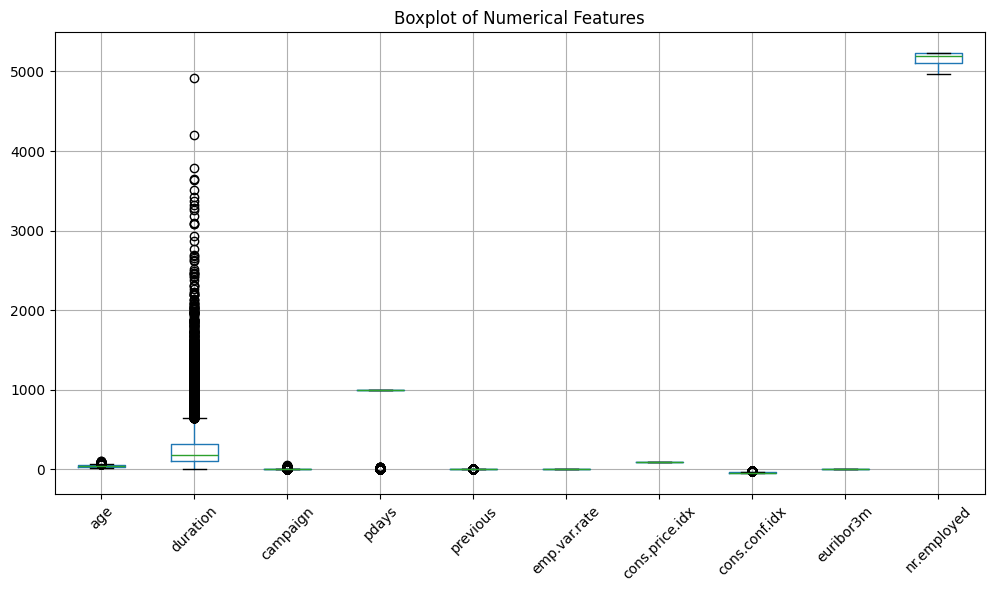

In [52]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
data[numerical_cols].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Boxplot of Numerical Features")
plt.show()

## Observation : There are some outliers in duration, pdays, but since the research paper does not explicitly mention removing outliers in the data preprocessing steps and we are reproducing the paper's methodology so it is better to keep the outliers.

# 3. Encoding Categorical Features:

## 3-1. Convert 'yes'/'no' to 0/1 : 'default', 'housing', 'loan', 'y'.

In [53]:
# Define binary columns
binary_columns = ['default', 'housing', 'loan', 'y']

# Replace values: 'no' → 0, 'yes' → 1, 'unknown' → NaN
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1, 'unknown': np.nan})

# Ensure correct data types
data[binary_columns] = data[binary_columns].infer_objects(copy=False)

C:\Users\elvis\AppData\Local\Temp\ipykernel_14296\2339926339.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1, 'unknown': np.nan})


In [54]:
# Count NaN values in each column
nan_counts = data[binary_columns].isna().sum()

# Print results
nan_counts

default    8597
housing     990
loan        990
y             0
dtype: int64

## Observation: When we did Convert 'yes'/'no' to 0/1 for  'default', 'housing', 'loan', 'y', we found there are a lot of 'unknown'. Instead of dropping them, we imputate them with mode.

In [55]:
data['default'] = data['default'].fillna(data['default'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['loan'] = data['loan'].fillna(data['loan'].mode()[0])

In [56]:
nan_counts = data[binary_columns].isna().sum()
nan_counts

default    0
housing    0
loan       0
y          0
dtype: int64

## Observation : After mode imputation, there is no more missing values.

In [57]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 3-2. OneHotEncoding : 'job', 'marital', 'education', 'contact', 'month', 'poutcome'.

In [58]:
# List the categorical columns to apply one-hot encoding to
categorical_columns = ['marital', 'job', 'education', 'month', 'contact', 'day_of_week', 'poutcome']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Show the updated data with one-hot encoded columns
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
1,57,0.0,0.0,0.0,149,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,False,False,False,True,True,False,False,False,True,False


In [59]:
# Convert True/False to 1/0 for Boolean columns
data = data.apply(lambda col: col.map({True: 1, False: 0}) if col.dtype == 'bool' else col)
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
1,57,0.0,0.0,0.0,149,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
2,37,0.0,1.0,0.0,226,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
3,40,0.0,0.0,0.0,151,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
4,56,0.0,0.0,1.0,307,1,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0


# 4. Data Splitting :

In [60]:
X = data.drop('y', axis=1)
y = data['y']  

In [130]:
# Split the data into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

# 5. Feature Scaling :

## The research paper does not explicitly mention which scaling method they used, but StandardScaler is a good choice for this dataset because:
### ✅ Preserves Shape → Keeps the original distribution (except for mean and variance).
### ✅ Handles Normally Distributed Data Well → If the feature follows a normal distribution, it works best.
### ✅ Used in Many Machine Learning Models → Models like Logistic Regression, SVM, and KNN perform better with standardized data.

In [131]:
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [133]:
X_train.head(10)

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_nov,month_oct,month_sep,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.540077,-0.010427,0.910127,-0.42424,0.722451,0.153808,0.194612,-0.348400,0.836370,1.532010,...,-0.334975,-0.134314,-0.11848,1.317357,-0.511639,-0.515358,2.025727,-0.495466,0.396445,-0.185295
1,-0.863386,-0.010427,0.910127,-0.42424,0.118641,-0.205303,0.194612,-0.348400,-1.204788,-1.184283,...,-0.334975,-0.134314,-0.11848,-0.759096,-0.511639,-0.515358,-0.493650,2.018302,0.396445,-0.185295
2,0.482553,-0.010427,0.910127,-0.42424,-0.542857,1.590256,0.194612,-0.348400,0.836370,1.532010,...,-0.334975,-0.134314,-0.11848,1.317357,-0.511639,-0.515358,2.025727,-0.495466,0.396445,-0.185295
3,1.540077,-0.010427,-1.098748,-0.42424,-0.677465,-0.564415,0.194612,-0.348400,0.836370,1.532010,...,-0.334975,-0.134314,-0.11848,1.317357,-0.511639,-0.515358,-0.493650,2.018302,0.396445,-0.185295
4,1.732354,-0.010427,0.910127,-0.42424,-0.254413,-0.564415,0.194612,-0.348400,-0.758285,2.053842,...,2.985297,-0.134314,-0.11848,-0.759096,-0.511639,1.940400,-0.493650,-0.495466,0.396445,-0.185295
5,-1.055663,-0.010427,0.910127,-0.42424,-0.635159,0.153808,0.194612,-0.348400,0.645011,0.718159,...,-0.334975,-0.134314,-0.11848,1.317357,-0.511639,-0.515358,-0.493650,2.018302,0.396445,-0.185295
6,-0.190417,-0.010427,-1.098748,-0.42424,1.353183,-0.564415,0.194612,1.679464,-1.204788,-0.869802,...,-0.334975,-0.134314,-0.11848,-0.759096,1.954504,-0.515358,-0.493650,-0.495466,-2.522418,-0.185295
7,-0.190417,-0.010427,-1.098748,-0.42424,0.130179,1.231144,0.194612,-0.348400,0.645011,0.718159,...,-0.334975,-0.134314,-0.11848,1.317357,-0.511639,-0.515358,-0.493650,-0.495466,0.396445,-0.185295
8,-0.959525,-0.010427,0.910127,-0.42424,-0.500552,-0.205303,0.194612,-0.348400,0.836370,0.586837,...,-0.334975,-0.134314,-0.11848,-0.759096,1.954504,-0.515358,-0.493650,-0.495466,0.396445,-0.185295
9,-0.478832,-0.010427,-1.098748,-0.42424,0.349397,-0.564415,0.194612,-0.348400,-1.204788,-1.184283,...,-0.334975,-0.134314,-0.11848,-0.759096,-0.511639,1.940400,-0.493650,-0.495466,0.396445,-0.185295


# Part 2. Steps reproduced from the paper :

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [135]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [136]:
Y_lr_pred = lr.predict(X_test)

In [137]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, y_test): .2f}')

Accuracy of Logistic Regression:  0.91


In [138]:
conf_lr = confusion_matrix(y_test, Y_lr_pred)
conf_lr

array([[11751,   345],
       [  879,   618]])

In [141]:
target_names = ['yes', 'no']
print(classification_report(y_test, Y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.93      0.97      0.95     12096
          no       0.64      0.41      0.50      1497

    accuracy                           0.91     13593
   macro avg       0.79      0.69      0.73     13593
weighted avg       0.90      0.91      0.90     13593



### The model performs well for the majority class ("yes") but struggles with the minority class ("no"), as shown by the low recall (43%). This suggests class imbalance, where many "no" instances are misclassified. 

# Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, y_train)

DecisionTreeClassifier()

In [144]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, y_test): .2f}')

Accuracy of Decision Tree:  0.89


In [145]:
conf_dt = confusion_matrix(y_test, Y_dt_pred)
conf_dt

array([[11343,   753],
       [  755,   742]])

In [146]:
print(classification_report(y_test, Y_dt_pred, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.94      0.94      0.94     12096
          no       0.50      0.50      0.50      1497

    accuracy                           0.89     13593
   macro avg       0.72      0.72      0.72     13593
weighted avg       0.89      0.89      0.89     13593



### The model performs well for predicting "yes" but struggles with "no" due to class imbalance. While accuracy is high (89%), the low precision (50%) and recall (53%) for "no" indicate many misclassifications. Improving class balance or adjusting thresholds could enhance minority class prediction.

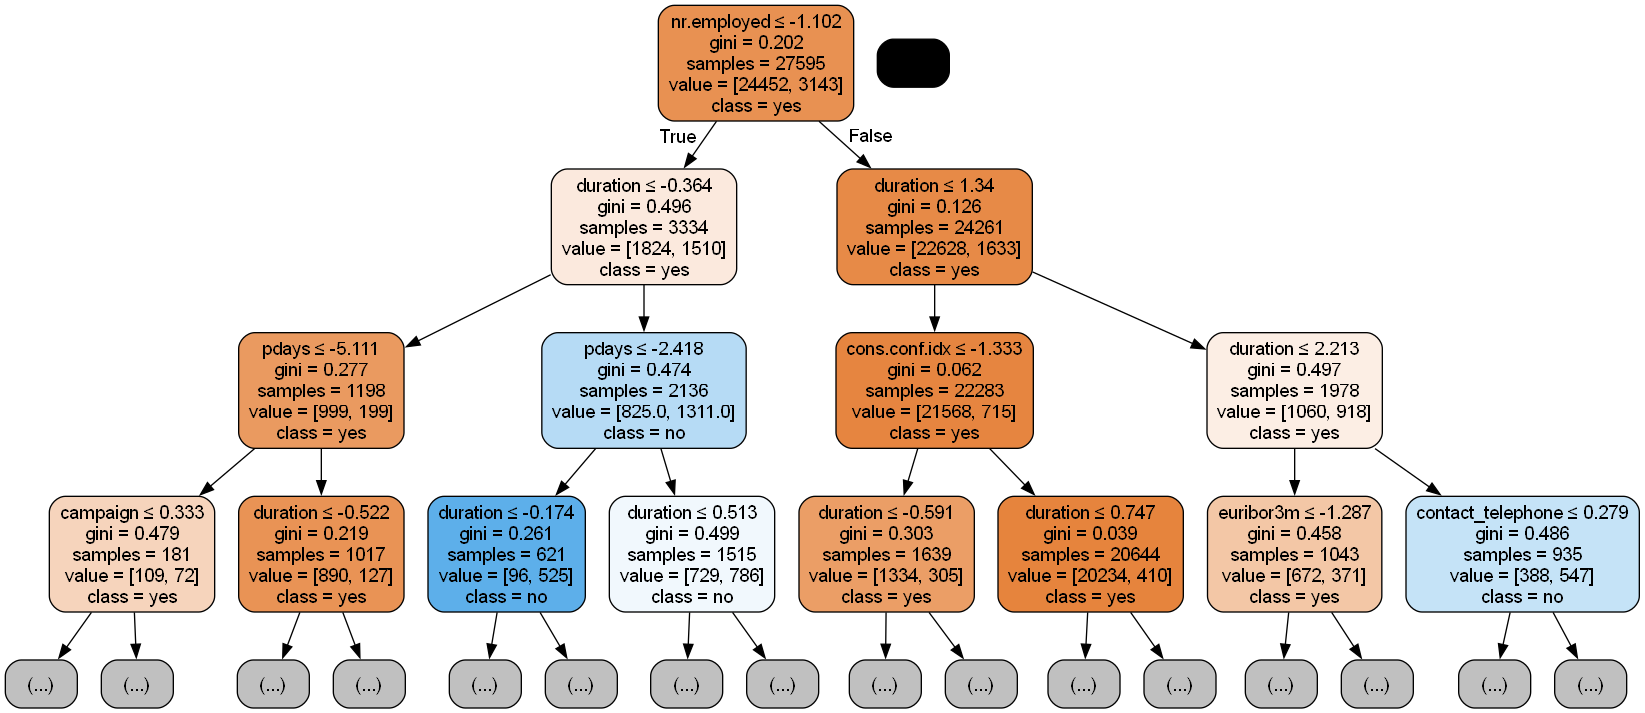

In [147]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['yes','no'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing.png')
Image(graph.create_png())

### This decision tree classifies whether a customer will respond positively ("yes") based on various features like employment rate (`nr.employed`), duration of contact (`duration`), and past interactions (`pdays`, `campaign`). The tree splits at different thresholds to maximize class separation, with the Gini index indicating impurity at each node. Orange nodes indicate a higher likelihood of "yes" responses, while blue nodes lean towards "no".

## 3. SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [51]:
Y_svc_pred = svc.predict(X_test)

In [52]:
print(f'Accuracy of SVM: {svc.score(X_test, y_test): .2f}')

Accuracy of SVM:  0.91


In [53]:
print(classification_report(y_test, Y_svc_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95      7303
         Yes       0.66      0.38      0.48       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



In [54]:
conf_svc = confusion_matrix(y_test, Y_svc_pred)
conf_svc

array([[7122,  181],
       [ 584,  351]])

# Part 3. Contributions:

# 1. KNN :

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [78]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

C:\Users\elvis\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\elvis\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python311\Lib\subprocess.py", line 1538, in _execute_ch

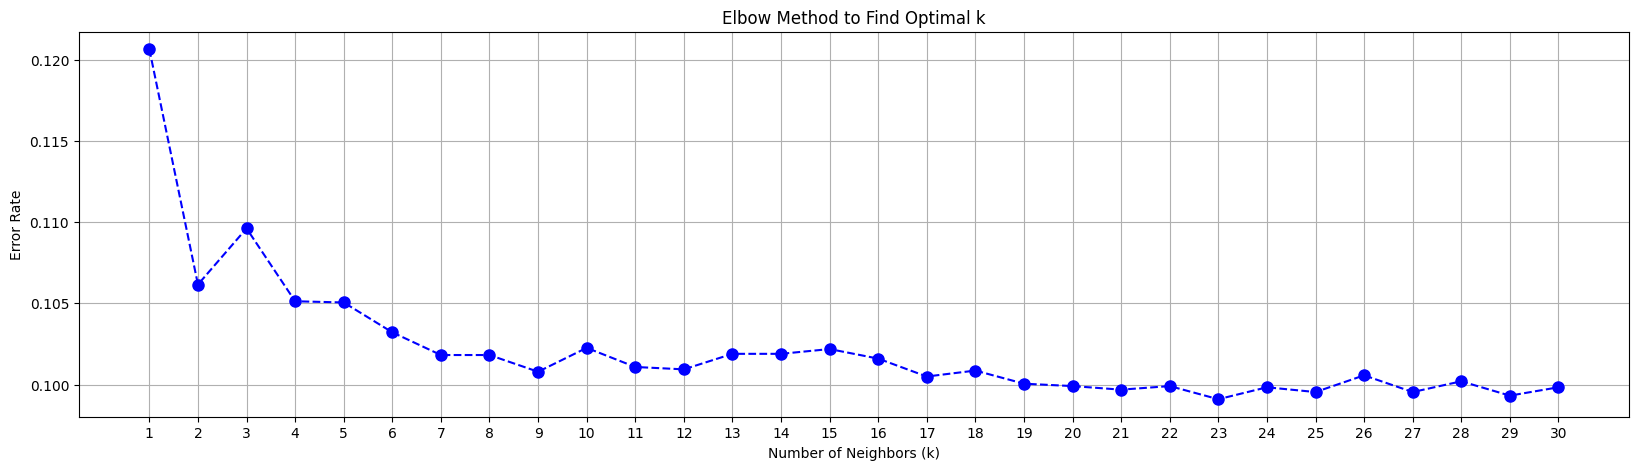

In [79]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [80]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [81]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_13 = KNeighborsClassifier(n_neighbors=13)

score_k_7 = cross_val_score(knn_7, X_train, y_train, cv=5)
score_k_13 = cross_val_score(knn_13, X_train, y_train, cv=5)

avg_score_k_7 = mean(score_k_7)
avg_score_k_13 = mean(score_k_13)

print(f"Average score for 7 neighbors: {avg_score_k_7}")
print(f"Average score for 13 neighbors: {avg_score_k_13}")

Average score for 7 neighbors: 0.896502989672042
Average score for 13 neighbors: 0.89896720420366


In [82]:
knn_13.fit(X_train, y_train)
Y_knn_pred = knn_13.predict(X_test)

In [83]:
print(f'Accuracy of KNN: {knn_13.score(X_test, y_test): .2f}')

Accuracy of KNN:  0.90


In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
target_names = ['No', 'Yes']

In [86]:
print(classification_report(y_test, Y_knn_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94     12056
         Yes       0.61      0.27      0.37      1537

    accuracy                           0.90     13593
   macro avg       0.76      0.62      0.66     13593
weighted avg       0.88      0.90      0.88     13593



In [87]:
conf_knn = confusion_matrix(y_test, Y_knn_pred)
conf_knn

array([[11799,   257],
       [ 1128,   409]])

## Observation : Accuracy of KNN is 0.90.

# 2. Random Forest :

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
Y_rf_pred = rf.predict(X_test)

In [91]:
print(f'Accuracy of Random Forest: {rf.score(X_test, y_test): .2f}')

Accuracy of Random Forest:  0.91


In [92]:
print(classification_report(y_test, Y_rf_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.97      0.95     12056
         Yes       0.65      0.49      0.56      1537

    accuracy                           0.91     13593
   macro avg       0.80      0.73      0.75     13593
weighted avg       0.90      0.91      0.91     13593



In [93]:
conf_rf = confusion_matrix(y_test, Y_rf_pred)
conf_rf

array([[11663,   393],
       [  791,   746]])

## Observation : Accuracy of Random Forest is 0.91.